<a href="https://colab.research.google.com/github/LoniQin/deep_learning_notebooks/blob/master/tensorflow/HousePricePredictorUsingHuberLoss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Packages

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## Load and preprocess data

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data()
y_train = y_train.reshape((y_train.shape[0], 1))
y_test = y_test.reshape((y_test.shape[0], 1))

57344/57026 [==============================] - 0s 0us/step


In [8]:
X = np.concatenate([x_train,x_test], axis=0)
print(X.shape)

(506, 13)


## Create Huber Loss object

In [9]:
from tensorflow.keras.losses import Loss

class HuberLoss(Loss):

    def __init__(self, threshold=1):
        super().__init__()
        self.threshold = threshold

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) <= self.threshold
        small_error_loss = tf.square(error) * 0.5
        big_error_loss = self.threshold * (tf.abs(error) - (0.5 * self.threshold))
        return tf.where(is_small_error, small_error_loss, big_error_loss)

## Create Nerual Network

In [13]:
model = keras.models.Sequential([
    keras.layers.InputLayer((13, )),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss=HuberLoss(), metrics=["mape", "mae"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 2,593
Trainable params: 2,593
Non-trainable params: 0
_________________________________________________________________


## Train the Nerual Network

In [14]:
early_stop = tf.keras.callbacks.EarlyStopping(patience=10)
history = model.fit(x_train, y_train, epochs=500, validation_data=(x_test, y_test), batch_size=16, verbose=1, callbacks=[early_stop])

Epoch 1/500
26/26 [==============================] - 1s 14ms/step - loss: 8.8866 - mape: 45.9506 - mae: 9.3765 - val_loss: 5.6771 - val_mape: 29.4087 - val_mae: 6.1568
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 5.7471 - mape: 31.0264 - mae: 6.2185 - val_loss: 6.2647 - val_mape: 31.7658 - val_mae: 6.7477
Epoch 3/500
26/26 [==============================] - 0s 3ms/step - loss: 5.0741 - mape: 25.8040 - mae: 5.5553 - val_loss: 5.8956 - val_mape: 28.1882 - val_mae: 6.3640
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 5.3445 - mape: 26.5522 - mae: 5.8237 - val_loss: 5.5962 - val_mape: 33.5881 - val_mae: 6.0776
Epoch 5/500
26/26 [==============================] - 0s 3ms/step - loss: 4.7362 - mape: 23.2027 - mae: 5.1956 - val_loss: 5.4678 - val_mape: 31.6357 - val_mae: 5.9432
Epoch 6/500
26/26 [==============================] - 0s 3ms/step - loss: 4.8289 - mape: 25.3661 - mae: 5.2979 - val_loss: 5.4547 - val_mape: 29.7838 - val_mae: 5.93

## Plot the learning curve

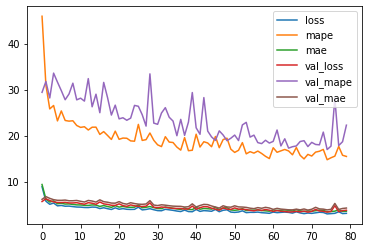

In [15]:
import pandas as pd
pd.DataFrame(history.history).plot()

## Predict data

In [17]:
y_pred = model.predict(x_test)

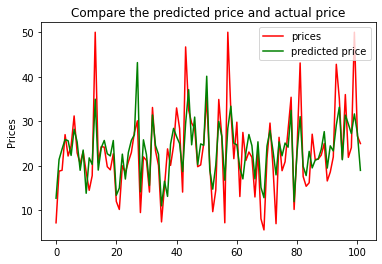

In [18]:
fig, ax = plt.subplots()
x = np.arange(y_test.shape[0])
ax.plot(y_test, label='prices', color='r')
ax.plot(y_pred, label='predicted price', color='g')
ax.set_ylabel('Prices')
ax.set_title("Compare the predicted price and actual price")
ax.legend()